#### UMAP can discover strange points in datasets.
The outliner can be useful/meanningful in our work.

In [1]:
import numpy as np
import sklearn.datasets
import sklearn.neighbors
import umap
import umap.plot
import matplotlib.pyplot as plt
from My_Wheels.Kill_Cache import kill_all_cache
import warnings

clean_cache = True
# This will clean all caches. Use only program crash!
if clean_cache == True:
    warnings.warn("All Cache will be clear. This will void your warranty!")
    conda_folder = r'C:\ProgramData\anaconda3\envs\umapzr'
    kill_all_cache(conda_folder)

%matplotlib inline
data, labels = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
# load mnist 784 data set



C:\Users\ZR\AppData\Local\Temp\ipykernel_13028\436294005.py:13: UserWarning: All Cache will be clear. This will void your warranty!
  warnings.warn("All Cache will be clear. This will void your warranty!")


Total 1290 cache folder killed.


c:\ProgramData\anaconda3\envs\umapzr\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


We have a traditional LOF algorithm, calculating longest distance in dataset.<br>
But this method is calculation expensive.

In [2]:
%%time
outlier_scores = sklearn.neighbors.LocalOutlierFactor(contamination=0.001428).fit_predict(data)
# this contamination will return 100 outliner, indexing in -1.

CPU times: total: 24min 45s
Wall time: 39.6 s


(100, 784)


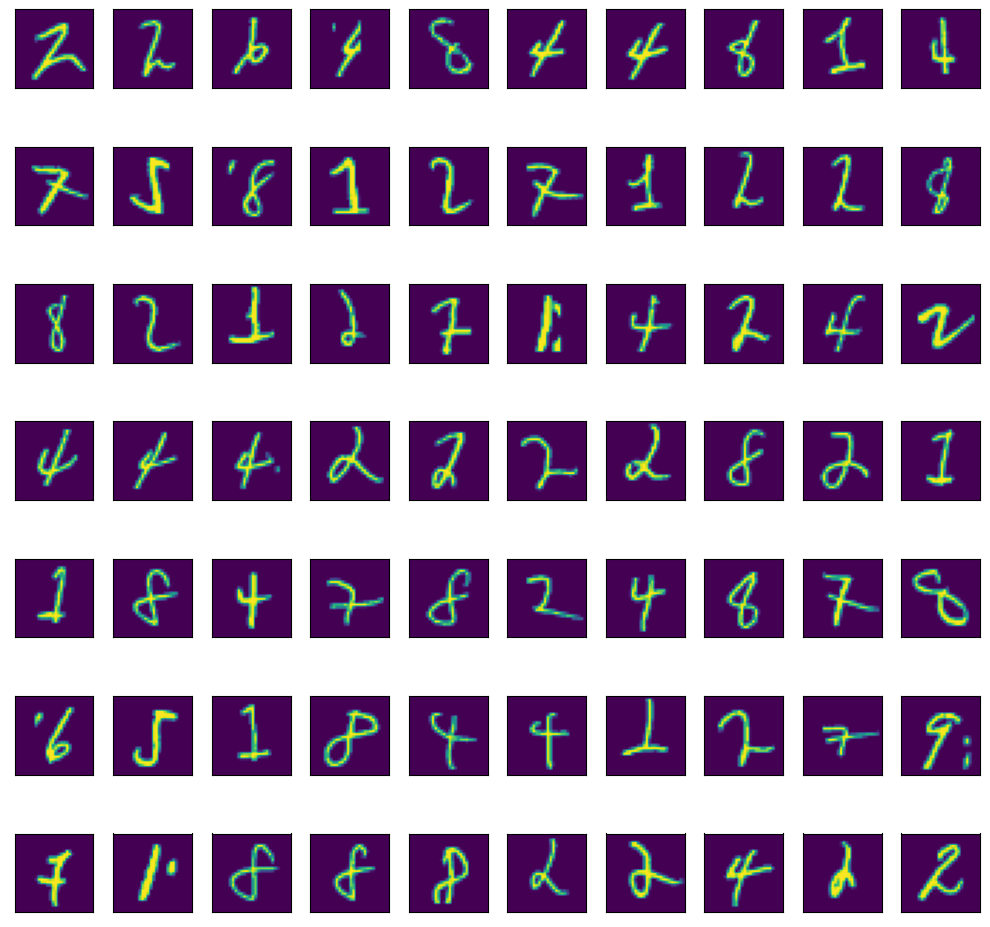

In [4]:
outlying_digits = data[outlier_scores == -1]
print(f'{outlying_digits.shape}')
#plot these points.
fig, axes = plt.subplots(7, 10, figsize=(10,10))
for i, ax in enumerate(axes.flatten()): # for each axes, plot a graph on it.
    ax.imshow(np.array(outlying_digits)[i,:].reshape((28,28)))
    plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()

As we can see above, these hand writings are a little strange.<br>
But UMAP can still do better.

<AxesSubplot: >

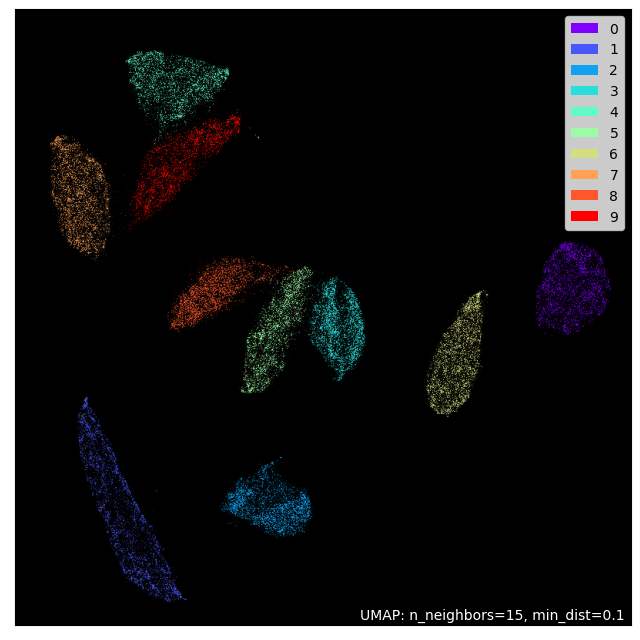

In [7]:
mapper = umap.UMAP().fit(data)
umap.plot.points(mapper, labels=labels,theme = 'fire')


Use embedded point to do outlier detection, this will run faster.

In [8]:
%%time
outlier_scores = sklearn.neighbors.LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)

CPU times: total: 641 ms
Wall time: 634 ms


(100, 784)


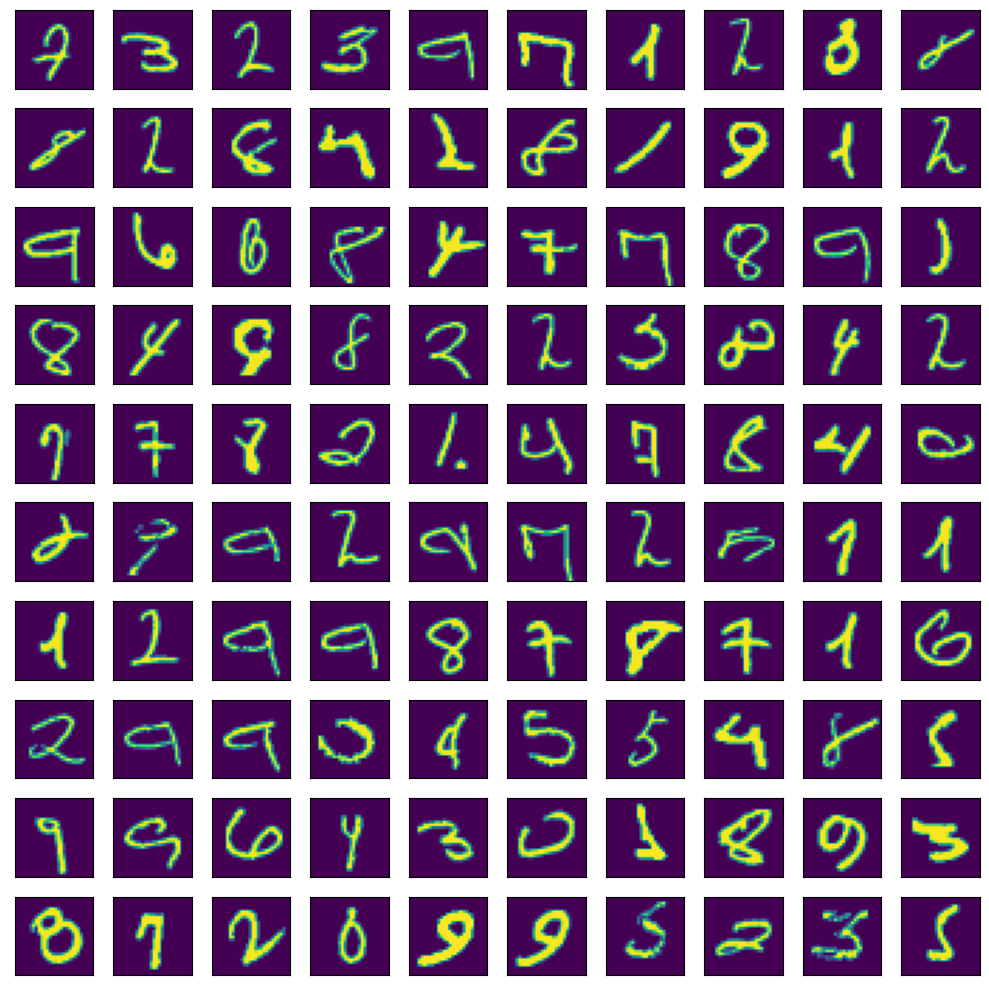

In [13]:
outlying_digits = data[outlier_scores == -1]
print(f'{outlying_digits.shape}')
fig, axes = plt.subplots(10, 10, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(np.array(outlying_digits)[i,:].reshape((28,28)))
    plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()

That's stranger!!<br>
Also it means that UMAP improve outlier detection ability.
##### Detection of Outlier will give us information embedded in data.
If we aim at outlier finder, set parameter ***set_op_mix_ratio*** lower((0-1),1 as default.)<br>
This will decrease perfomance, but maintain outlier information.

<AxesSubplot: >

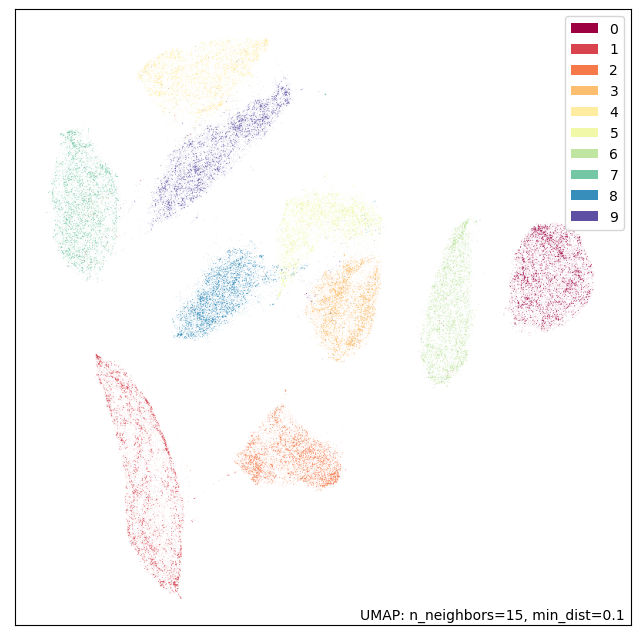

In [14]:
mapper = umap.UMAP(set_op_mix_ratio=0.25).fit(data)
umap.plot.points(mapper, labels=labels)

(100, 784)
CPU times: total: 3.36 s
Wall time: 3.33 s


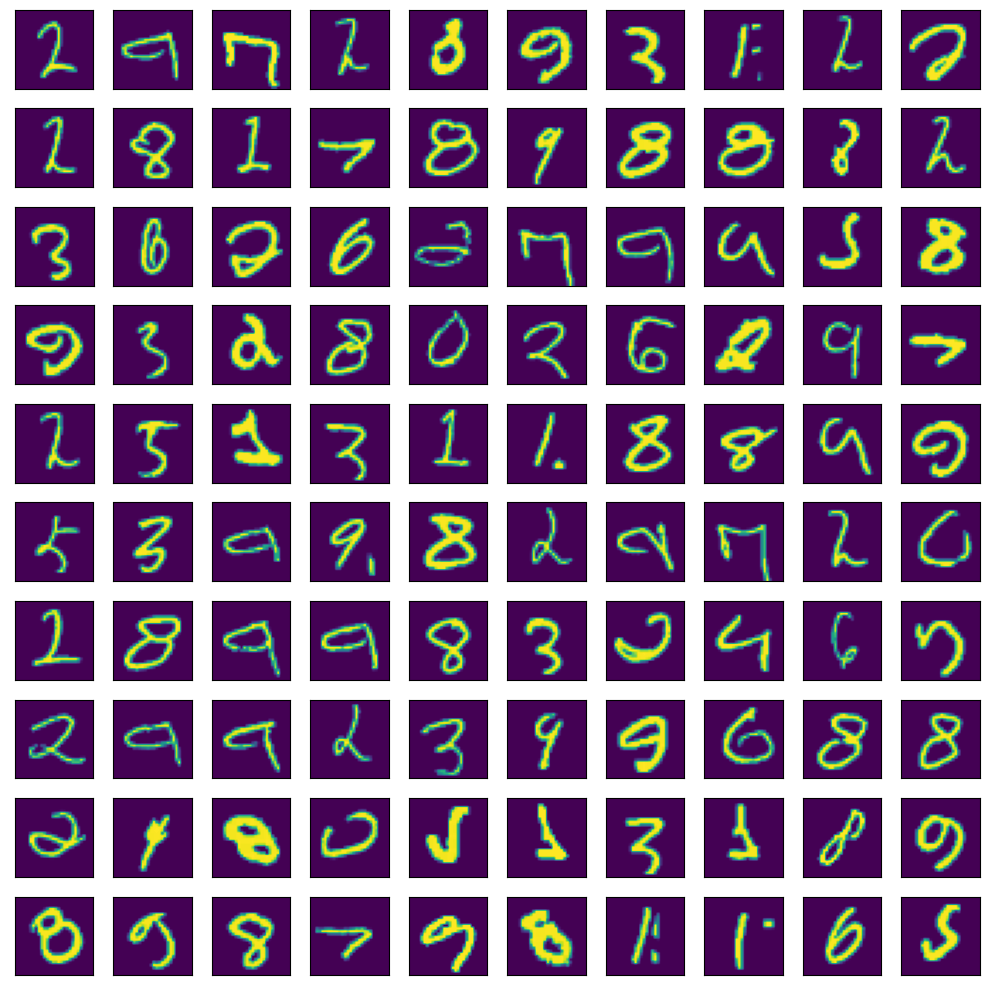

In [16]:
%%time
outlier_scores = sklearn.neighbors.LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)
outlying_digits = data[outlier_scores == -1]
print(f'{outlying_digits.shape}')
fig, axes = plt.subplots(10, 10, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(np.array(outlying_digits)[i,:].reshape((28,28)))
    plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()